In [2]:
# 导入扩展库
import re                           # 正则表达式库
import jieba                        # 结巴分词
import jieba.posseg                 # 词性获取
import collections                  # 词频统计库
import numpy                        # numpy数据处理库
from PIL import Image               # 图像处理库
import wordcloud                    # 词云展示库
import matplotlib.pyplot as plt     # 图像展示库（这里以plt代表库的全称）


In [96]:
# 读取文件
#fn = open("G:\论文\硕士论文\初稿\数据\特斯拉\特斯拉新闻.txt",'r',encoding = 'UTF-8')  # 打开文件
fn = open("G:\论文\硕士论文\初稿\数据\特斯拉\特斯拉微博消极.txt",'r',encoding = 'UTF-8')  # 打开文件
string_data = fn.read()                          # 读出整个文件
fn.close() 

In [97]:
# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
string_data = re.sub(pattern, '', string_data)     # 将符合模式的字符去除

In [98]:
# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list = []

In [99]:
#去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open("H:/资料/小象学院机器学习/22、LDA实践/22.LDA/22.stopword.txt", 'r') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表

In [100]:
# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(100)    # 获取前number个最高频的词
print(word_counts_top)

[('特斯拉', 321), ('\u200b', 100), ('马斯克', 83), ('维权', 82), ('车展', 57), ('消费者', 50), ('车主', 48), ('上海', 47), ('美国', 44), ('Model', 42), ('刹车', 38), ('中国', 36), ('驾驶', 34), ('涨价', 33), ('O', 32), ('女', 30), ('事件', 28), ('续航', 27), ('失灵', 24), ('回应', 24), ('\xa0', 23), ('自动', 22), ('元', 21), ('汽车', 21), ('视频', 21), ('称', 19), ('标准', 19), ('陶琳', 18), ('数据', 18), ('企业', 18), ('妥协', 18), ('新闻', 18), ('车', 17), ('##', 17), ('升级版', 17), ('埃隆', 16), ('售价', 16), ('说', 15), ('车顶', 15), ('发布', 15), ('报道', 15), ('1000', 15), ('公司', 14), ('狗狗', 14), ('币', 14), ('货币', 14), ('收起', 13), ('全文', 13), ('d', 13), ('Cybertruck', 13), ('CEO', 13), ('加密', 13), ('事故', 12), ('技术', 12), ('微博', 12), ('夸大', 12), ('车型', 12), ('承认', 12), ('不合理', 11), ('华为', 11), ('谨慎', 11), ('链接', 11), ('纽约', 11), ('投资', 11), ('前', 11), ('做', 10), ('现场', 10), ('起诉', 10), ('中', 10), ('L', 10), ('网页', 10), ('新能源', 10), ('展出', 10), ('Y', 10), ('诉求', 9), ('火箭', 9), ('系统', 9), ('副总裁', 9), ('媒体', 9), ('皮卡', 9), ('原型车', 9), ('周六', 9), ('消息',

In [101]:
# 英文词性转中文词性字典：详细版
En2Cn_Pro = {
    'a'    : '形容词',
    'ad'   : '形容词-副形词',
    'ag'   : '形容词-形容词性语素',
    'al'   : '形容词-形容词性惯用语',
    'an'   : '形容词-名形词',
    'b'    : '区别词',
    'bl'   : '区别词-区别词性惯用语',
    'c'    : '连词',
    'cc'   : '连词-并列连词',
    'd'    : '副词',
    'e'    : '叹词',
    'eng'  : '英文',
    'f'    : '方位词',
    'g'    : '语素',
    'h'    : '前缀',
    'i'    : '成语',
    'j'    : '简称略语',
    'k'    : '后缀',
    'l'    : '习用语',
    'm'    : '数词',
    'mq'   : '数量词',
    'n'    : '名词',
    'ng'   : '名词-名词性语素',
    'nl'   : '名词-名词性惯用语',
    'nr'   : '名词-人名',
    'nr1'  : '名词-汉语姓氏',
    'nr2'  : '名词-汉语名字',
    'nrf'  : '名词-音译人名',
    'nrfg' : '名词-人名',    
    'nrj'  : '名词-日语人名',
    'ns'   : '名词-地名',
    'nsf'  : '名词-音译地名',
    'nt'   : '名词-机构团体名',
    'nz'   : '名词-其他专名',
    'o'    : '拟声词',
    'p'    : '介词',
    'pba'  : '介词-“把”',
    'pbei' : '介词-“被”',
    'q'    : '量词',
    'qt'   : '量词-动量词',
    'qv'   : '量词-时量词',
    'r'    : '代词',
    'rg'   : '代词-代词性语素',
    'rr'   : '代词-人称代词',
    'rz'   : '代词-指示代词',
    'rzs'  : '代词-处所指示代词',
    'rzt'  : '代词-时间指示代词',
    'rzv'  : '代词-谓词性指示代词',
    'ry'   : '代词-疑问代词',
    'rys'  : '代词-处所疑问代词',
    'ryt'  : '代词-时间疑问代词',
    'ryv'  : '代词-谓词性疑问代词',
    's'    : '处所词',
    't'    : '时间词',
    'tg'   : '时间词-时间词性语素',
    'u'    : '助词',
    'ude1' : '助词-“的”“底”',
    'ude2' : '助词-“地”',
    'ude3' : '助词-“得”',
    'udeng': '助词-“等”“等等”“云云”',
    'udh'  : '助词-“的话”',
    'uguo' : '助词-“过”',
    'ule'  : '助词-“了”“喽”',
    'ulian': '助词-“连”',
    'uls'  : '助词-“来讲”“来说”“而言”“说来”',
    'usuo' : '助词-“所”',
    'uyy'  : '助词-“一样”“一般”“似的”“般”',
    'uzhe' : '助词-“着”',
    'uzhi' : '助词-“之”',
    'v'    : '动词',
    'vd'   : '动词-副动词',
    'vf'   : '动词-趋向动词',
    'vg'   : '动词-动词性语素',
    'vi'   : '动词-不及物动词（内动词）',
    'vl'   : '动词-动词性惯用语',
    'vn'   : '动词-名动词',
    'vshi' : '动词-“是”',
    'vx'   : '动词-形式动词',
    'vyou' : '动词-“有”',
    'w'    : '标点符号',
    'wb'   : '标点符号-百分号千分号，全角：％ ‰ 半角：%',
    'wd'   : '标点符号-逗号，全角：， 半角：,',
    'wf'   : '标点符号-分号，全角：； 半角： ; ',
    'wj'   : '标点符号-句号，全角：。',
    'wh'   : '标点符号-单位符号，全角：￥ ＄ ￡ ° ℃ 半角 $',
    'wkz'  : '标点符号-左括号，全角：（ 〔 ［ ｛ 《 【 〖 〈 半角：( [ { <',
    'wky'  : '标点符号-右括号，全角：） 〕 ］ ｝ 》 】 〗 〉 半角： ) ] { >',
    'wm'   : '标点符号-冒号，全角：： 半角： :',
    'wn'   : '标点符号-顿号，全角：、',
    'wp'   : '标点符号-破折号，全角：—— －－ ——－ 半角：—',
    'ws'   : '标点符号-省略号，全角：…… …',
    'wt'   : '标点符号-叹号，全角：！ 半角：!',
    'ww'   : '标点符号-问号，全角：？ 半角：?',
    'wyz'  : '标点符号-左引号，全角：“ ‘ 『',
    'wyy'  : '标点符号-右引号，全角：” ’ 』',
    'x'    : '字符串',
    'xu'   : '字符串-网址URL',
    'xx'   : '字符串-非语素字',
    'y'    : '语气词',
    'z'    : '状态词',
    'un'   : '未知词',
}

In [102]:
# 输出至工作台，并导出“词频.txt”文件
print ('\n词语\t词频\t词性')
print ('——————————')
fileOut = open("output.txt",'w',encoding='UTF-8')     # 创建文本文件；若已存在，则进行覆盖
fileOut.write('词语\t词频\t词性\n')
fileOut.write('——————————\n')
count = 0
for TopWord,Frequency in word_counts_top:                       # 获取词语和词频
    for POS in jieba.posseg.cut(TopWord):                       # 获取词性
        if count == 100:
            break
        print(TopWord + '\t',str(Frequency) + '\t')#,list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)])                    # 逐行输出数据
        fileOut.write(TopWord + '\t' + str(Frequency) + '\t') #+ list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)] + '\n') # 逐行写入str格式数据
        count += 1
fileOut.close()                                                 # 关闭文件


词语	词频	词性
——————————
特斯拉	 321	
​	 100	
马斯克	 83	
维权	 82	
车展	 57	
消费者	 50	
车主	 48	
上海	 47	
美国	 44	
Model	 42	
刹车	 38	
中国	 36	
驾驶	 34	
涨价	 33	
O	 32	
女	 30	
事件	 28	
续航	 27	
失灵	 24	
回应	 24	
 	 23	
自动	 22	
元	 21	
汽车	 21	
视频	 21	
称	 19	
标准	 19	
陶琳	 18	
数据	 18	
企业	 18	
妥协	 18	
新闻	 18	
车	 17	
##	 17	
升级版	 17	
埃隆	 16	
售价	 16	
说	 15	
车顶	 15	
发布	 15	
报道	 15	
1000	 15	
公司	 14	
狗狗	 14	
币	 14	
货币	 14	
收起	 13	
全文	 13	
d	 13	
Cybertruck	 13	
CEO	 13	
加密	 13	
事故	 12	
技术	 12	
微博	 12	
微博	 12	
夸大	 12	
车型	 12	
承认	 12	
不合理	 11	
华为	 11	
谨慎	 11	
链接	 11	
纽约	 11	
投资	 11	
前	 11	
做	 10	
现场	 10	
起诉	 10	
中	 10	
L	 10	
网页	 10	
新能源	 10	
展出	 10	
Y	 10	
诉求	 9	
火箭	 9	
系统	 9	
副总裁	 9	
媒体	 9	
皮卡	 9	
原型车	 9	
周六	 9	
消息	 9	
长	 9	
500	 9	
美元	 9	
郑州	 9	
相关	 8	
买	 8	
国产车	 8	
接受	 8	
官方	 8	
时间	 8	
管理局	 8	
近日	 8	
展开	 8	
车辆	 8	
提供	 8	
发生	 8	



开始制作词云……
制作完成！
日期：2020.07.16


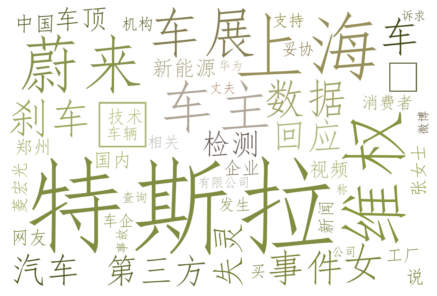

In [88]:
def color_func(word,font_size,position,random_state,**kwargs):
 
    #字体位置 y
    if position[0]<500:
        r=random_state.randint(0,40)# 相当于random.randint(0,40)
    else:
        r=random_state.randint(100,150)
 
    #字体位置 x
    if position[1]<500:
        g=random_state.randint(0,40)
    else:
        g=random_state.randint(100,150)
 
    #字体大小 
    if font_size<50:
        b=random_state.randint(0,40)
    else:
        b=random_state.randint(100,150)
    return (r,g,b)

# 词频展示
print ('\n开始制作词云……')                    # 提示当前状态
mask = numpy.array(Image.open("C:/Users/93784/Pictures/图片.jpg"))      # 定义词频背景
wc = wordcloud.WordCloud(
    font_path = 'C:/Windows/Fonts/simfang.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色
    mask = mask,                                # 文字颜色+形状（有mask参数再设定宽高是无效的）
    max_words = 50,                         # 显示词数
    ##color_func=color_func,
    max_font_size = 300                         # 最大字号
    
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # 将词云颜色设置为背景图方案
plt.figure('词云')                                                               # 弹框名称与大小
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')
print ('制作完成！')                                                             # 提示当前状态
#print ('\n作者：丨小小花丨')
print ('日期：2020.07.16') 
plt.show()  